In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
print(X.shape)
(506, 13)

(150, 4)


(506, 13)

Создание Pandas Dataframe

In [3]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

In [5]:
data = make_dataframe(load_iris)  #Создание датафрейма
data.head()                         #Вывод первых 5 строк

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Поиск пустых значений в колонках

In [6]:
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))
    #Пустых значений не обнаружено

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0


In [7]:
data.describe() #Описательные статистики

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Распределениие значений целевого признака

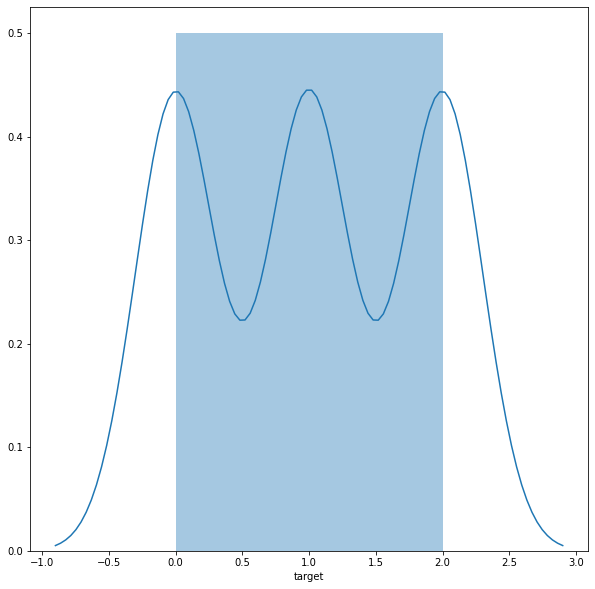

In [8]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['target'])

Распределение похоже на нормальное

Парные диаграммы для понимания общей картины

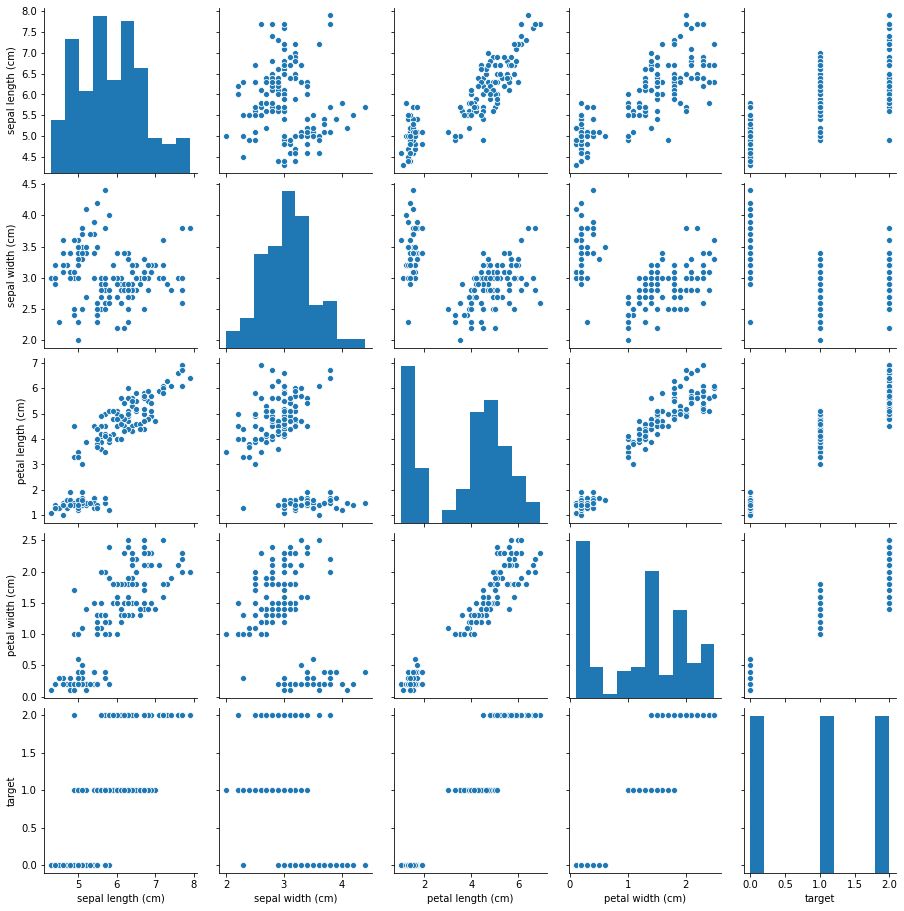

In [9]:
sns.pairplot(data)

Находим почти линейную зависимость между значениями двух колонок 

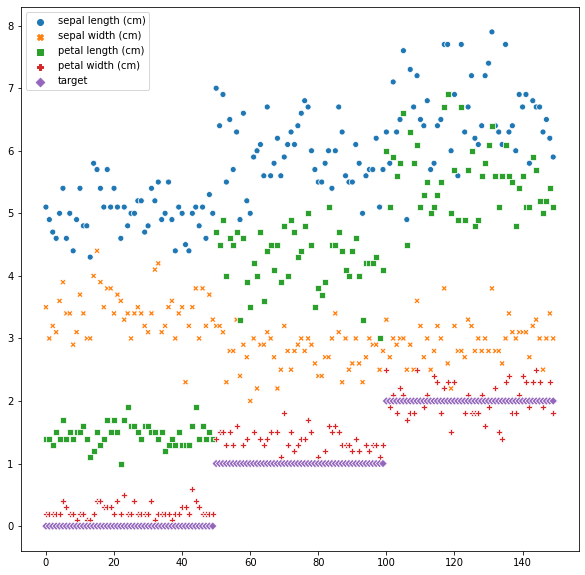

In [21]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, data=data)

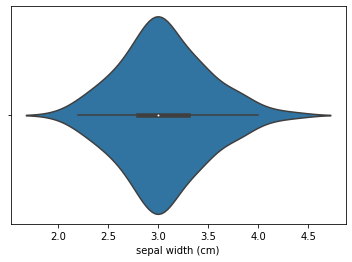

In [29]:
sns.violinplot(x=data['sepal width (cm)'])

По violin plot видим, что распределение бимодальное.

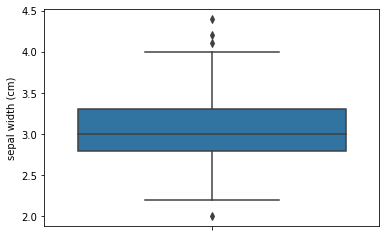

In [31]:
sns.boxplot(y=data['sepal width (cm)'])

**Корреляционный анализ**



Построим корреляционную матрицу

In [32]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Также построим матрицу корреляций по Пирсону

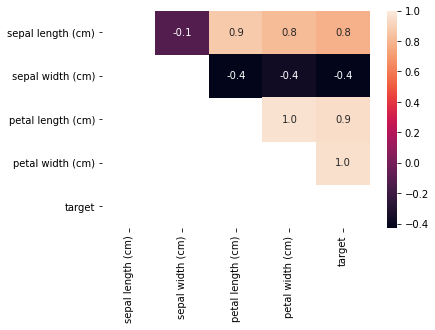

In [33]:
# Треугольный вариант матрицы Пирсона
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.1f')

Выявлена корреляция между показателями RAD и TAX

Использовав Solar correlation map, получаем ту же зависимость

![alt text](https://www.oreilly.com/content/wp-content/uploads/sites/2/2019/06/image03-ed83fc425039627301882be4b06e32a5.png)